<a href="https://colab.research.google.com/github/karolinawegrzyn/psi2/blob/main/Z10_D_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

# Bagging and Pasting

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

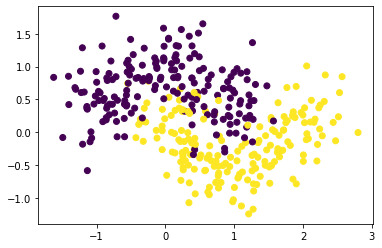

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

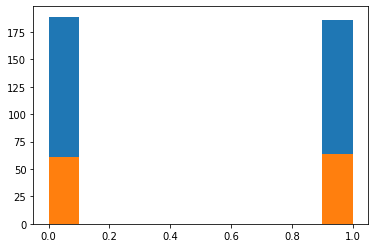

In [4]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

* Scikit-Learn oferuje prosty interfejs API do **bagging** i **pasting** . 

* Poniższy kod uczy zespół złożony z 500 drzewa decyzyjnego, z które zostało nauczonych na 100 elementach ze zbioru uczącego losowo pobranych z zestawu treningowego ze zwracaniem 

* Jest to przykład **bagging**, ale jeśli chcesz użyć **pasting** zamiast tego, po prostu ustaw **bootstrap=False**. 

* Parametr **n_jobs** mówi Scikit-Learn ile rdzeni procesora można użyć do treningu i prognoz (-1 mówi Scikit-Learn, aby używać wszystkich dostępnych rdzeni):

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

The BaggingClassifier automatycznie wykonuje miękkie głosowanie zamiast twardego, jeśli klasyfikator bazowy może oszacować prawdopodobieństwa klasy (tj. jeśli ma metodę **predict_proba()**), co ma miejsce w przypadku klasyfikatorów Decision Trees.

In [6]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [7]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


# Zad. 

Narysuj wynik dla

* BaggingClassifier
* DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


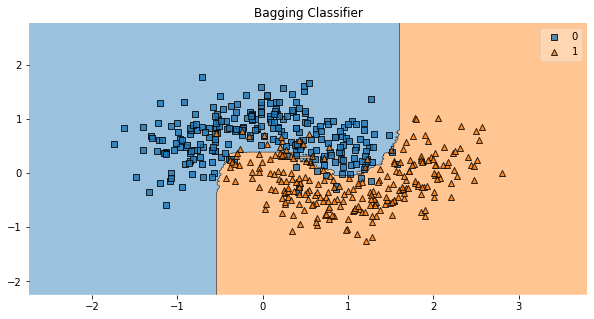

In [8]:
plt.figure(figsize=(10,5))
plot_decision_regions(X, y, bag_clf)
plt.title('Bagging Classifier')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


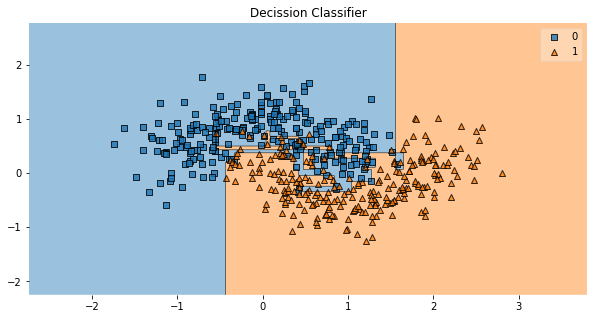

In [9]:
plt.figure(figsize=(10,5))
plot_decision_regions(X, y, tree_clf)
plt.title('Decission Classifier')
plt.show()

# Out-of-Bag Evaluation

* W przypadku metody **bagging** niektóre przykłady mogą być próbkowane kilka razy dla dowolnego predyktora  podczas gdy inne mogą nie być próbkowane w ogóle. 

* Domyślnie BaggingClassifier pobiera próbki ze zwracaniem (**bootstrap = True**), gdzie $m$ jest rozmiarem zestawu treningowego. 

* Oznacza to, że tylko około 63% instancji szkoleniowych jest próbkowanych średnio dla każdego z predyktorów. 

* Pozostałe 37% instancji szkoleniowych, które nie są próbkowane, nazywane są instancjami **out-of-bag (oob)**. 

* Zauważ, że nie są one takie same dla wszystkich predyktorów. 

* Ponieważ predykator nigdy nie widzi instancji **out-of-bag (oob)** podczas treningu, klasyfikator może być oceniany na tych instancjach. 

* Możesz ocenić komitet klasyfikatorów uśredniając oceny każdego z predyktorów na **out-of-bag (oob)**. 

In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500,
    bootstrap=True, 
    n_jobs=-1, 
    oob_score=True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8933333333333333

In [11]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896